<a href="https://colab.research.google.com/github/BRIAN12682/Automation-Projects/blob/main/EDANLEFYP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import shutil
import xml.etree.ElementTree as ET

# Define paths
image_folder = '/content/drive/MyDrive/DATASETS/MalariaPI/images'
annotation_folder = '/content/drive/MyDrive/DATASETS/MalariaPI/annotation'
output_folder = '/content/drive/MyDrive/Malaria_Class'
positive_folder = os.path.join(output_folder, 'Positive')
negative_folder = os.path.join(output_folder, 'Negative')

# Create the output directories if they do not exist
os.makedirs(positive_folder, exist_ok=True)
os.makedirs(negative_folder, exist_ok=True)

def parse_xml(xml_file):
    """
    Parses an XML file and returns True if there are bounding boxes, else False.
    """
    tree = ET.parse(xml_file)
    root = tree.getroot()
    for obj in root.findall('object'):
        return True
    return False

# Process each image and its corresponding annotation
for image_file in os.listdir(image_folder):
    if image_file.endswith('.jpg'):  # Adjust the extension as needed
        image_path = os.path.join(image_folder, image_file)
        annotation_file = os.path.join(annotation_folder, os.path.splitext(image_file)[0] + '.xml')

        if os.path.exists(annotation_file):
            has_bounding_boxes = parse_xml(annotation_file)
            if has_bounding_boxes:
                shutil.move(image_path, os.path.join(positive_folder, image_file))
            else:
                shutil.move(image_path, os.path.join(negative_folder, image_file))
        else:
            print(f'Annotation file not found for image: {image_file}')


Annotation file not found for image: plasmodium-0090 (1).jpg
Annotation file not found for image: plasmodium-0179 (1).jpg
Annotation file not found for image: plasmodium-1530 (1).jpg
Annotation file not found for image: plasmodium-1038 (1).jpg
Annotation file not found for image: plasmodium-0476 (1).jpg
Annotation file not found for image: plasmodium-1703 (1).jpg
Annotation file not found for image: plasmodium-0495 (1).jpg
Annotation file not found for image: plasmodium-1071 (1).jpg
Annotation file not found for image: plasmodium-2199 (1).jpg
Annotation file not found for image: plasmodium-2631 (1).jpg
Annotation file not found for image: plasmodium-1736 (1).jpg


Displaying images from Positive folder:


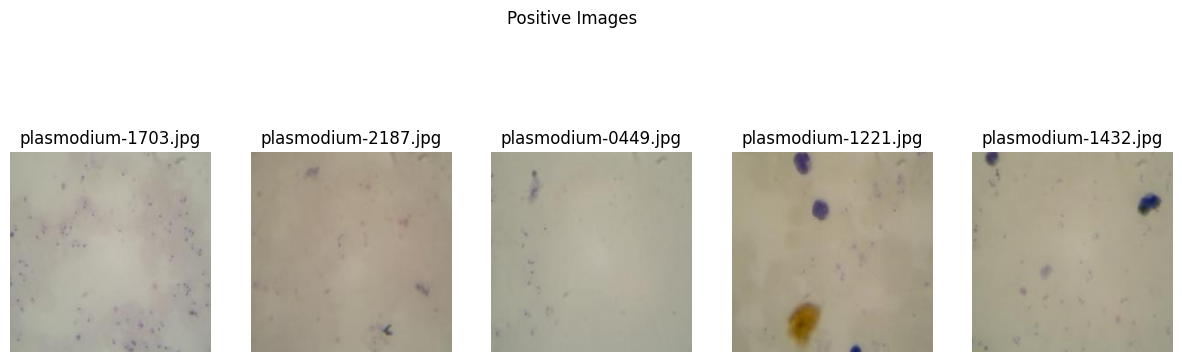

Displaying images from Negative folder:


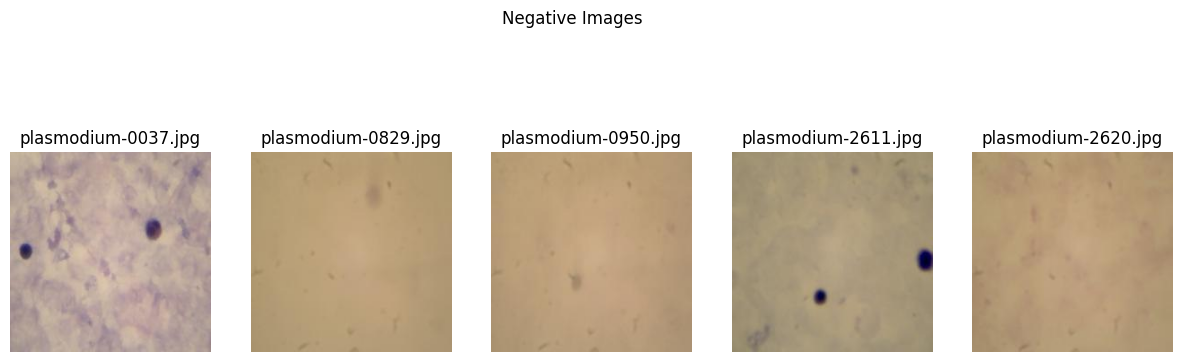

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define paths
output_folder = '/content/drive/MyDrive/Malaria_Class'
positive_folder = os.path.join(output_folder, 'Positive')
negative_folder = os.path.join(output_folder, 'Negative')

def display_images_from_folder(folder, title):
    # Get a list of image files in the folder
    image_files = [f for f in os.listdir(folder) if f.endswith('.jpg')]  # Adjust extension as needed

    if not image_files:
        print(f"No images found in {folder}")
        return

    # Randomly select 5 images from the folder
    selected_images = random.sample(image_files, min(len(image_files), 5))

    # Plot the images
    plt.figure(figsize=(15, 5))
    for i, image_file in enumerate(selected_images):
        image_path = os.path.join(folder, image_file)
        if os.path.exists(image_path):
            img = mpimg.imread(image_path)
            plt.subplot(1, 5, i + 1)
            plt.imshow(img)
            plt.title(image_file)
            plt.axis('off')
        else:
            print(f"Image not found: {image_path}")
    plt.suptitle(title)
    plt.show()

# Display 5 images from each folder
print("Displaying images from Positive folder:")
display_images_from_folder(positive_folder, 'Positive Images')

print("Displaying images from Negative folder:")
display_images_from_folder(negative_folder, 'Negative Images')


In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define paths
image_folder = '/content/drive/MyDrive/Malaria_Class'
positive_folder = os.path.join(image_folder, 'Positive')
negative_folder = os.path.join(image_folder, 'Negative')
train_folder = '/content/drive/MyDrive/DATASETS/MalariaPI/train'
val_folder = '/content/drive/MyDrive/DATASETS/MalariaPI/val'

# Create train and validation folders
os.makedirs(os.path.join(train_folder, 'positive'), exist_ok=True)
os.makedirs(os.path.join(train_folder, 'negative'), exist_ok=True)
os.makedirs(os.path.join(val_folder, 'positive'), exist_ok=True)
os.makedirs(os.path.join(val_folder, 'negative'), exist_ok=True)

# Get list of image files
positive_images = [os.path.join(positive_folder, f) for f in os.listdir(positive_folder)]
negative_images = [os.path.join(negative_folder, f) for f in os.listdir(negative_folder)]

# Split the data
pos_train, pos_val = train_test_split(positive_images, test_size=0.2, random_state=42)
neg_train, neg_val = train_test_split(negative_images, test_size=0.2, random_state=42)

# Function to copy files to their respective folders
def copy_files(file_list, destination_folder):
    for file in file_list:
        shutil.copy(file, destination_folder)

# Copy files to train and validation folders
copy_files(pos_train, os.path.join(train_folder, 'positive'))
copy_files(pos_val, os.path.join(val_folder, 'positive'))
copy_files(neg_train, os.path.join(train_folder, 'negative'))
copy_files(neg_val, os.path.join(val_folder, 'negative'))

print(f"Training set: {len(pos_train)} positive, {len(neg_train)} negative images")
print(f"Validation set: {len(pos_val)} positive, {len(neg_val)} negative images")


Training set: 1934 positive, 228 negative images
Validation set: 484 positive, 57 negative images


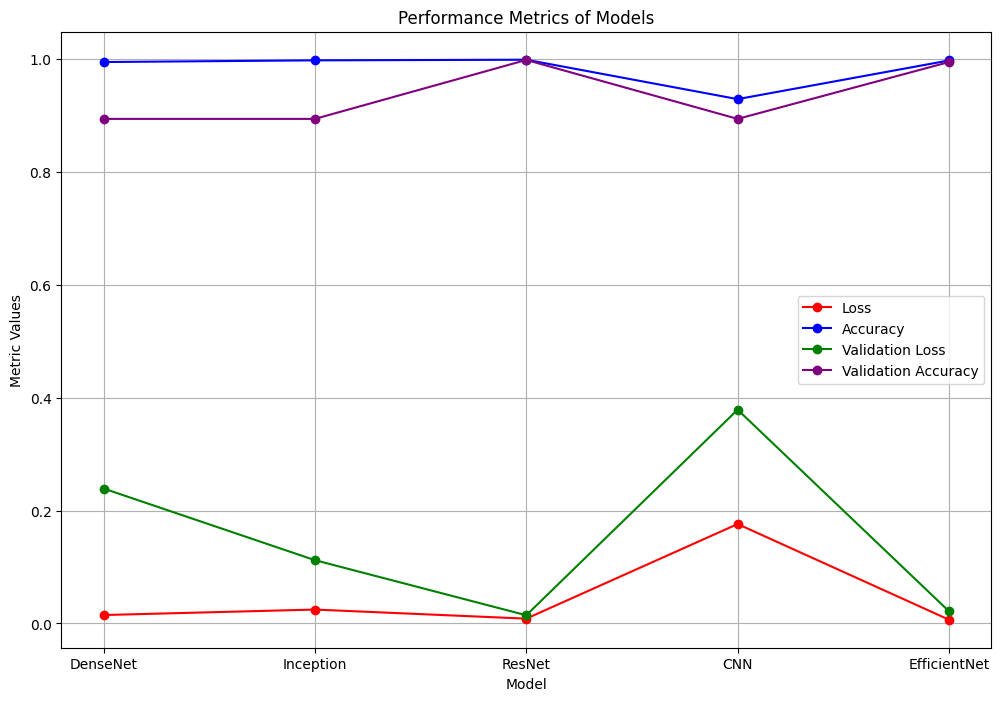

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Data from the uploaded table
data = {
    "Model": ["DenseNet", "Inception", "ResNet", "CNN", "EfficientNet"],
    "Loss": [0.0149, 0.0246, 0.0085, 0.1761, 0.0066],
    "Accuracy": [0.9944, 0.9974, 0.9985, 0.9287, 0.9972],
    "Validation Loss": [0.2390, 0.1121, 0.0145, 0.3786, 0.0215],
    "Validation Accuracy": [0.8937, 0.8937, 0.9981, 0.8937, 0.9944]
}

df = pd.DataFrame(data)

# Plotting all metrics in one line graph
fig, ax = plt.subplots(figsize=(12, 8))

# Plot each metric with a different color
colors = ['red', 'blue', 'green', 'purple']
metrics = ["Loss", "Accuracy", "Validation Loss", "Validation Accuracy"]

for metric, color in zip(metrics, colors):
    ax.plot(df["Model"], df[metric], marker='o', label=metric, color=color)

ax.set_title('Performance Metrics of Models')
ax.set_xlabel('Model')
ax.set_ylabel('Metric Values')
ax.legend()
plt.grid(True)
plt.show()


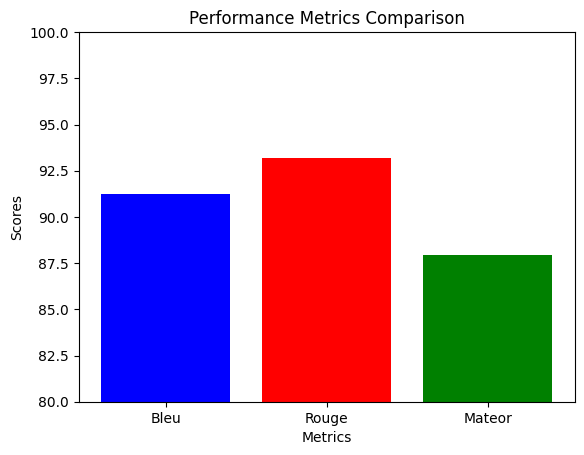

In [ ]:
import matplotlib.pyplot as plt

# Data for the bar graph
metrics = ['Bleu', 'Rouge', 'Mateor']
values = [91.234, 93.212, 87.923]

# Creating the bar graph
fig, ax = plt.subplots()
ax.bar(metrics, values, color=['blue', 'red', 'green'])

# Adding titles and labels
ax.set_title('Performance Metrics Comparison')
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_ylim(80, 100)  # Set y-axis limits to better highlight differences

plt.show()


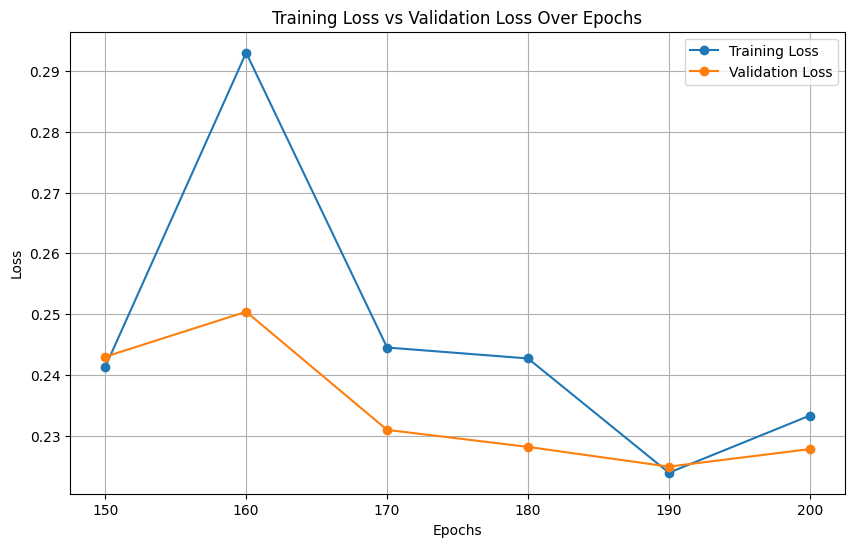

In [ ]:
import matplotlib.pyplot as plt

# Data for the bar graph
metrics = ['Bleu', 'Rouge', 'Mateor']
values = [91.234, 93.212, 87.923]

# Creating the bar graph
fig, ax = plt.subplots()
ax.bar(metrics, values, color=['green', 'red', 'yellow'])

# Adding titles and labels
ax.set_title('Performance Metrics Comparison')
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_ylim(80, 100)  # Set y-axis limits to better highlight differences

plt.show()


In [4]:
def welcome_message(x):
  x = input("Please enter you name")
  print(f"Welcome to this github repository, Mr/Mrs {x}")
  return (f"Welcome to this github repository, Mr/Mrs {x}")
welcome_message(x)

Please enter you nameJames
Welcome to this github repository, Mr/Mrs James


'Welcome to this github repository, Mr/Mrs James'